In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("climate_change_indicators.csv")
data.head(6)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
5,6,Angola,AO,AGO,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.044,0.828,1.331,1.609,0.870,1.395,1.752,1.162,1.553,1.212


In [3]:
data.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')

In [4]:
data.dtypes

ObjectId       int64
Country       object
ISO2          object
ISO3          object
Indicator     object
              ...   
F2018        float64
F2019        float64
F2020        float64
F2021        float64
F2022        float64
Length: 72, dtype: object

In [5]:
data.shape

(225, 72)

In [6]:
print(data.Country.unique())
print()
print("Total countries: " + str(len(data.Country.unique())))

['Afghanistan, Islamic Rep. of' 'Albania' 'Algeria' 'American Samoa'
 'Andorra, Principality of' 'Angola' 'Anguilla' 'Antigua and Barbuda'
 'Argentina' 'Armenia, Rep. of' 'Aruba, Kingdom of the Netherlands'
 'Australia' 'Austria' 'Azerbaijan, Rep. of' 'Bahamas, The'
 'Bahrain, Kingdom of' 'Bangladesh' 'Barbados' 'Belarus, Rep. of'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Cayman Islands' 'Central African Rep.' 'Chad' 'Chile'
 'China, P.R.: Hong Kong' 'China, P.R.: Macao' 'China, P.R.: Mainland'
 'Colombia' 'Comoros, Union of the' 'Congo, Dem. Rep. of the'
 'Congo, Rep. of' 'Cook Islands' 'Costa Rica' 'Croatia, Rep. of' 'Cuba'
 'Cyprus' 'Czech Rep.' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Rep.'
 'Ecuador' 'Egypt, Arab Rep. of' 'El Salvador'
 'Equatorial Guinea, Rep. of' 'Eritrea, The State of' 'Estonia, Rep.

In [7]:
def rename_col(s):
    s = s.replace(' ', '_')
    s = s.replace('-', '_')
    a = s.split('_')
    for i in range(len(a)):
        if not all([c == c.upper() for c in a[i]]):
            a[i] = a[i].capitalize()
    return '_'.join(a)

data.columns = [rename_col(c) for c in data.columns]
data.columns

Index(['Objectid', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')

In [8]:
col = ['Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor']
for c in col:
    print(len(data[c].unique()))

1
1
1
1
1
1


# Global Temperature Trends

How has the global Temperature changed over the last 6 decades

In [9]:
data.drop("Objectid", axis=1, inplace=True)
data.describe()[1:]

,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
mean,0.163053,-0.013476,-0.006043,-0.070059,-0.247027,0.105505,-0.110832,-0.199110,0.157942,0.092487,...,0.931199,1.114815,1.269773,1.439521,1.280785,1.302113,1.443061,1.552038,1.343531,1.382113
std,0.405080,0.341812,0.387348,0.309305,0.270734,0.378423,0.339484,0.270131,0.308540,0.352072,...,0.321595,0.564903,0.462162,0.401091,0.393999,0.596786,0.467510,0.621930,0.484692,0.669279
min,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,-1.288000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,-0.097000,-0.164000,-0.205500,-0.236500,-0.392500,-0.035750,-0.259500,-0.340000,-0.009000,-0.053000,...,0.743500,0.744000,1.017750,1.147000,1.027500,0.865000,1.169000,1.161750,1.019000,0.878000
50%,0.064500,-0.056000,-0.003000,-0.056000,-0.230500,0.098000,-0.146000,-0.187000,0.204000,0.129000,...,0.897000,0.986500,1.215000,1.446000,1.282000,1.125000,1.412000,1.477000,1.327000,1.315000
75%,0.318500,0.114000,0.230500,0.132500,-0.091500,0.277000,0.015000,-0.067000,0.349000,0.299000,...,1.187500,1.335500,1.520500,1.714000,1.535000,1.834000,1.698000,1.826250,1.629000,1.918000
max,1.892000,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.939000,0.978000,...,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


Text(0.5, 1.0, 'Mean Global Temperatures')

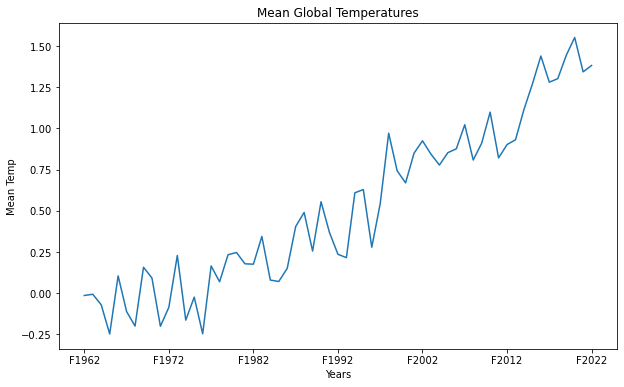

In [18]:
plt.figure(figsize=(10,6))
g=mean_for_columns = data.describe().loc['mean'][1:].plot(kind= "line")
plt.xlabel("Years")
plt.ylabel("Mean Temp")
plt.title("Mean Global Temperatures")


# Regional Analysis

How do Temperatures differ across continents

In [24]:
url = 'https://statisticstimes.com/geography/countries-by-continents.php'

try:
    tables = pd.read_html(url, match='Afghanistan')
    if tables:
        country =tables[0]
        country.head()
    else:
        print("No country found with the match")
except ValueError as e:
    print(f"value in Reading Html: {e}")
    
country.head()

,No,Country or Area,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
0,1,Afghanistan,AFG,4,Southern Asia,NaN,Asia
1,2,Åland Islands,ALA,248,Northern Europe,NaN,Europe
2,3,Albania,ALB,8,Southern Europe,NaN,Europe
3,4,Algeria,DZA,12,Northern Africa,NaN,Africa
4,5,American Samoa,ASM,16,Polynesia,NaN,Oceania


In [28]:
country["Region 2"].unique()

array([nan, 'Sub-Saharan Africa', 'Latin America and the Caribbean',
       'Channel Islands'], dtype=object)

In [29]:
country["Region 1"].unique()

array(['Southern Asia', 'Northern Europe', 'Southern Europe',
       'Northern Africa', 'Polynesia', 'Middle Africa', 'Caribbean',
       'Antarctica', 'South America', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Northern America',
       'Southern Africa', 'Eastern Africa', 'South-eastern Asia',
       'Eastern Asia', 'Melanesia', 'Micronesia', 'Central Asia'],
      dtype=object)

In [30]:
country.rename(columns={'Country or Area':'Country', 'ISO-alpha3 Code':'ISO3'}, inplace=True)
country.head()

,No,Country,ISO3,M49 Code,Region 1,Region 2,Continent
0,1,Afghanistan,AFG,4,Southern Asia,NaN,Asia
1,2,Åland Islands,ALA,248,Northern Europe,NaN,Europe
2,3,Albania,ALB,8,Southern Europe,NaN,Europe
3,4,Algeria,DZA,12,Northern Africa,NaN,Africa
4,5,American Samoa,ASM,16,Polynesia,NaN,Oceania


In [32]:
country.shape

(249, 7)

In [31]:
df2 = data.copy()
df2 = df2.merge(country, on='ISO3', how='inner')
df2.head()

,Country_x,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,F1961,...,F2019,F2020,F2021,F2022,No,Country_y,M49 Code,Region 1,Region 2,Continent
0,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",-0.113,...,0.910,0.498,1.327,2.012,1,Afghanistan,4,Southern Asia,NaN,Asia
1,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.627,...,1.675,1.498,1.536,1.518,3,Albania,8,Southern Europe,NaN,Europe
2,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.164,...,1.115,1.926,2.330,1.688,4,Algeria,12,Northern Africa,NaN,Africa
3,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.079,...,1.539,1.430,1.268,1.256,5,American Samoa,16,Polynesia,NaN,Oceania
4,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.736,...,1.964,2.562,1.533,3.243,6,Andorra,20,Southern Europe,NaN,Europe


<Figure size 864x504 with 0 Axes>

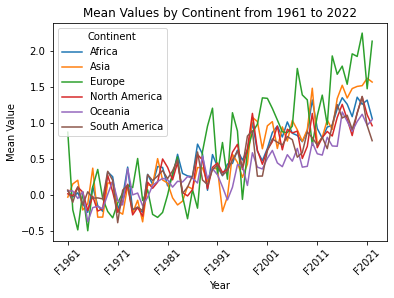

In [46]:
# Ensure all column names from F1961 to F2022 exist in the DataFrame
col = [f'F{y}' for y in range(1961, 2023)]

# Group by 'Continent' and calculate the mean for each year, then transpose
grouped_data = df2.groupby("Continent")[col].mean().T

# Set the figure size
plt.figure(figsize=(12, 7))

# Plot the data
ax = grouped_data.plot(kind='line')

# Customize the plot (optional)
ax.set_title('Mean Values by Continent from 1961 to 2022')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Value')
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Country Specific Trends


Which countries expereinced the most significant Temperature Changes in the past decade?

In [48]:
def get_range(row):
    return max(row) - min(row)

col = ['Country'] + [f'F{y}' for y in range(2013, 2023)]

idxmx = data[col[1:]].apply(axis=1, func=get_range).idxmax()
maxim = data[col[1:]].apply(axis=1, func=get_range).max()

print(data.loc[idxmx][col])
print(maxim)

Country    Botswana
F2013          0.77
F2014        -0.092
F2015         1.546
F2016         1.469
F2017         0.017
F2018         0.734
F2019         1.525
F2020         0.493
F2021        -0.425
F2022        -1.305
Name: 25, dtype: object
2.851


In [60]:
col = ['Country'] + [f'F{y}' for y in range(1962, 2023)]
data.columns

Index(['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code',
       'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962', 'F1963', 'F1964',
       'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970', 'F1971', 'F1972',
       'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978', 'F1979', 'F1980',
       'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986', 'F1987', 'F1988',
       'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994', 'F1995', 'F1996',
       'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002', 'F2003', 'F2004',
       'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012',
       'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020',
       'F2021', 'F2022', 'Avg_Temp_Change'],
      dtype='object')

In [55]:
idxmx = data[col[1:]].apply(axis=1, func=get_range).idxmax()
maxim = data[col[1:]].apply(axis=1, func=get_range).max()

print(data.loc[idxmx][col])
print(maxim)

Country    Greenland
F1962          0.842
F1963          0.308
F1964          0.257
F1965            0.8
             ...    
F2018          0.934
F2019          2.206
F2020          1.274
F2021          2.482
F2022          1.413
Name: 78, Length: 62, dtype: object
5.119999999999999


# Decade Comparison

<AxesSubplot:>

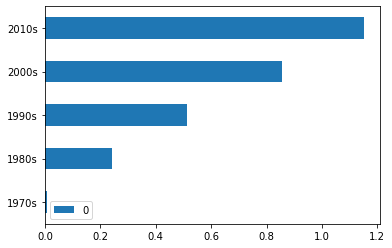

In [58]:
col = ['Country'] + [f'F{y}' for y in range(1962, 2023)]

d = dict()
for i in range(1970, 2020, 10):
    col = [f'F{y}' for y in range(i, i+10)]
    d[f'{i}s'] = data[col].mean(axis=1).mean()
    
pd.DataFrame.from_dict(d, orient='index').plot(kind='barh')

# Impact Assessment

Based on temperature trends, which countries may need to prioritize climate adaptation strategies?

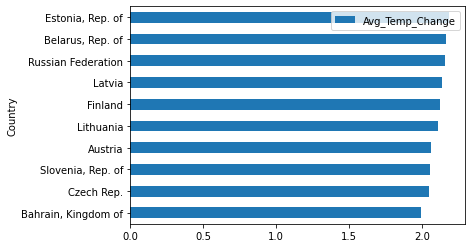

In [59]:
col = [f'F{y}' for y in range(2013, 2023)]

data['Avg_Temp_Change'] = data[col].mean(axis=1)
ax = data[['Country', 'Avg_Temp_Change']].sort_values('Avg_Temp_Change', ascending=False).head(10).plot(kind='barh', x='Country', y='Avg_Temp_Change')
ax.invert_yaxis()

# Forecasting Trends

Using historical data, can we forecast future temperature trends for the next decade?

In [72]:
#using prophet model


In [71]:
#!pip install prophet


In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [89]:
col = ['Country'] + [f'F{y}' for y in range(1962, 2023)]
df=data[col]
df.isnull().sum()

Country     0
F1962      36
F1963      37
F1964      37
F1965      37
           ..
F2018      12
F2019      12
F2020      13
F2021      12
F2022      12
Length: 62, dtype: int64

In [92]:
# Handle null values (example: forward
df.fillna(method='ffill', inplace=True)
df.isnull().sum()

Country    0
F1962      0
F1963      0
F1964      0
F1965      0
          ..
F2018      0
F2019      0
F2020      0
F2021      0
F2022      0
Length: 62, dtype: int64

Epoch 1/20
51/51 [==============================] - 8s 11ms/step - loss: 0.0456
Epoch 2/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0327
Epoch 3/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0276
Epoch 4/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0339
Epoch 5/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0314
Epoch 6/20
51/51 [==============================] - 0s 10ms/step - loss: 0.0292
Epoch 7/20
51/51 [==============================] - 0s 10ms/step - loss: 0.0378
Epoch 8/20
51/51 [==============================] - 1s 10ms/step - loss: 0.0300
Epoch 9/20
51/51 [==============================] - 1s 10ms/step - loss: 0.0313
Epoch 10/20
51/51 [==============================] - 1s 10ms/step - loss: 0.0292
Epoch 11/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0330
Epoch 12/20
51/51 [==============================] - 1s 10ms/step - loss: 0.0318
Epoch 13/20
51/51 [======================

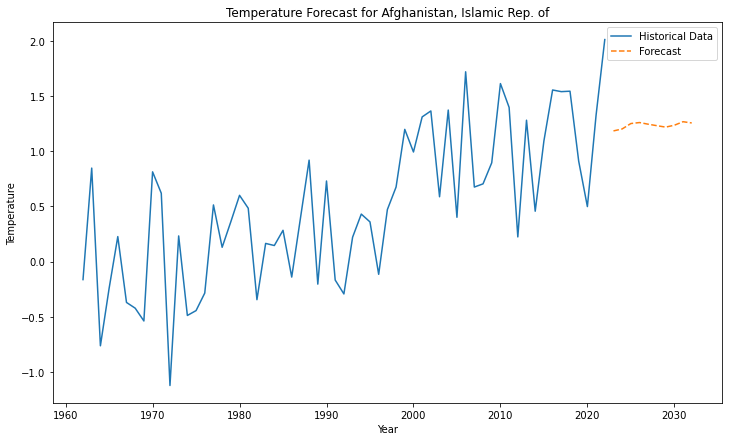

Epoch 1/20
51/51 [==============================] - 5s 10ms/step - loss: 0.0528
Epoch 2/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0267
Epoch 3/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0363
Epoch 4/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0244
Epoch 5/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0275
Epoch 6/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0252
Epoch 7/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0314
Epoch 8/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0260
Epoch 9/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0269
Epoch 10/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0244
Epoch 11/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0273
Epoch 12/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0249
Epoch 13/20
51/51 [==================

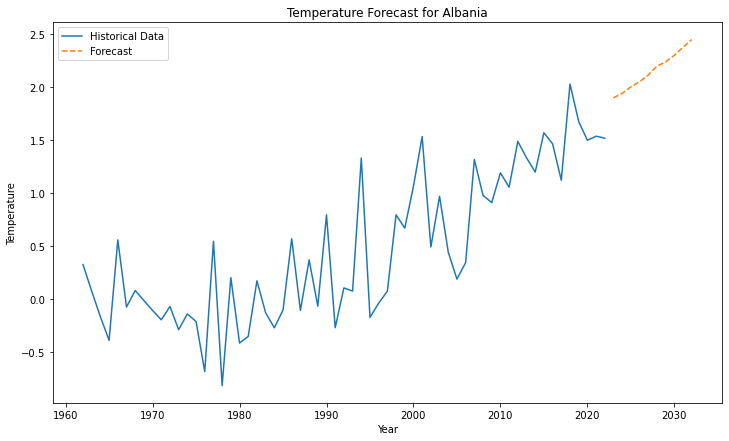

Epoch 1/20
51/51 [==============================] - 6s 12ms/step - loss: 0.0658
Epoch 2/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0273
Epoch 3/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0265
Epoch 4/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0262
Epoch 5/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0256
Epoch 6/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0296
Epoch 7/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0248
Epoch 8/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0322
Epoch 9/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0256
Epoch 10/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0211
Epoch 11/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0249
Epoch 12/20
51/51 [==============================] - 1s 15ms/step - loss: 0.0231
Epoch 13/20
51/51 [==================

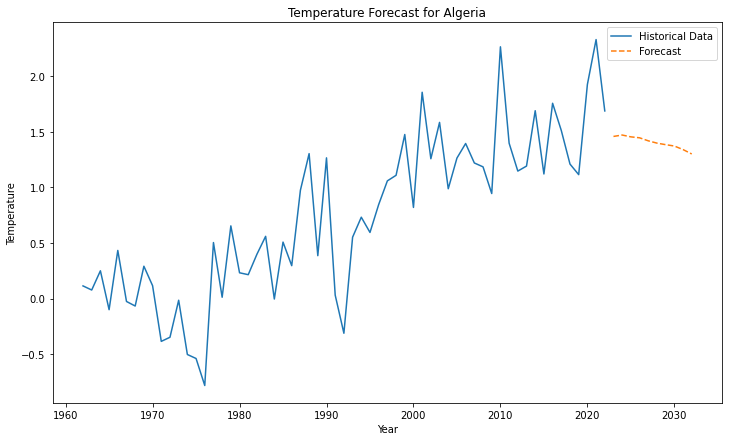

Epoch 1/20
51/51 [==============================] - 7s 13ms/step - loss: 0.0576
Epoch 2/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0206
Epoch 3/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0229
Epoch 4/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0185
Epoch 5/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0199
Epoch 6/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0267
Epoch 7/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0191
Epoch 8/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0227
Epoch 9/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0210
Epoch 10/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0210
Epoch 11/20
51/51 [==============================] - 1s 15ms/step - loss: 0.0232
Epoch 12/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0211
Epoch 13/20
51/51 [==================

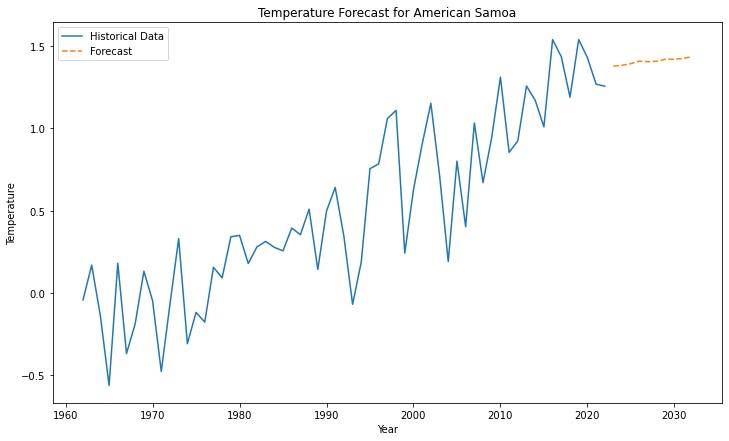

Epoch 1/20
51/51 [==============================] - 7s 12ms/step - loss: 0.0445
Epoch 2/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0191
Epoch 3/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0209
Epoch 4/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0194
Epoch 5/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0199
Epoch 6/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0194
Epoch 7/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0196
Epoch 8/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0207
Epoch 9/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0181
Epoch 10/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0184
Epoch 11/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0223
Epoch 12/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0183
Epoch 13/20
51/51 [==================

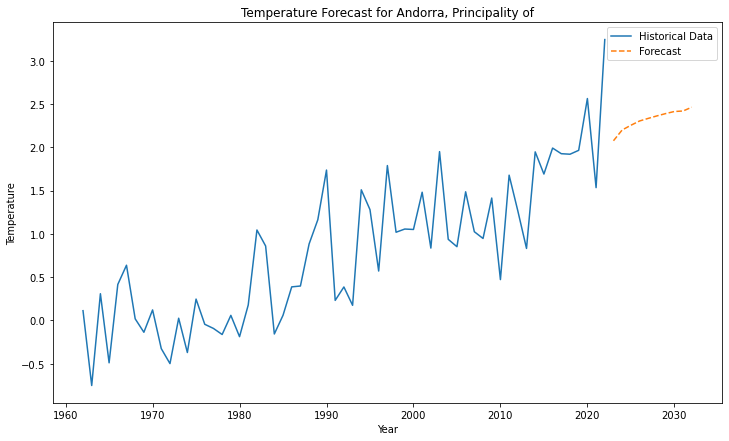

Epoch 1/20
51/51 [==============================] - 6s 11ms/step - loss: 0.0454
Epoch 2/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0268
Epoch 3/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0250
Epoch 4/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0284
Epoch 5/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0310
Epoch 6/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0227
Epoch 7/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0220
Epoch 8/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0293
Epoch 9/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0260
Epoch 10/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0245
Epoch 11/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0283
Epoch 12/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0219
Epoch 13/20
51/51 [==================

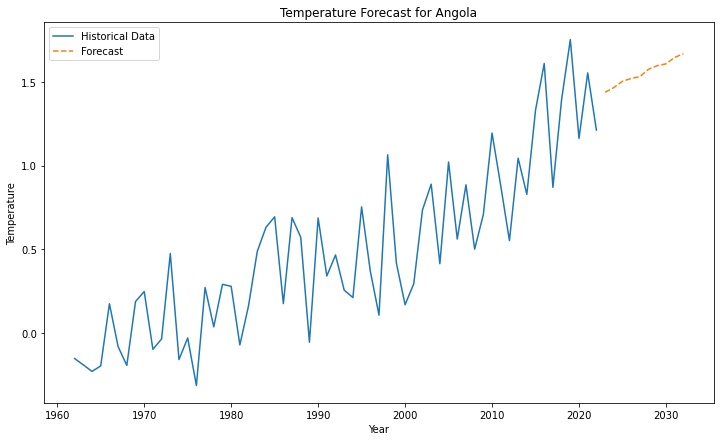

Epoch 1/20
51/51 [==============================] - 9s 15ms/step - loss: 0.0459
Epoch 2/20
51/51 [==============================] - 1s 17ms/step - loss: 0.0275
Epoch 3/20
51/51 [==============================] - 1s 17ms/step - loss: 0.0301
Epoch 4/20
51/51 [==============================] - 1s 18ms/step - loss: 0.0297
Epoch 5/20
51/51 [==============================] - 1s 15ms/step - loss: 0.0343
Epoch 6/20
51/51 [==============================] - 1s 20ms/step - loss: 0.0292
Epoch 7/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0262
Epoch 8/20
51/51 [==============================] - 1s 17ms/step - loss: 0.0291
Epoch 9/20
51/51 [==============================] - 1s 17ms/step - loss: 0.0263
Epoch 10/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0293
Epoch 11/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0299
Epoch 12/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0276
Epoch 13/20
51/51 [==================

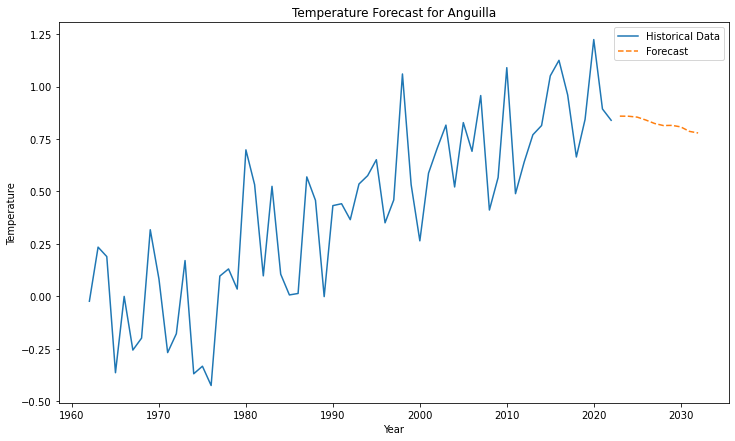

Epoch 1/20
51/51 [==============================] - 9s 15ms/step - loss: 0.0590
Epoch 2/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0398
Epoch 3/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0376
Epoch 4/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0303
Epoch 5/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0298
Epoch 6/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0280
Epoch 7/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0297
Epoch 8/20
37/51 [====================>.........] - ETA: 0s - loss: 0.0237

KeyboardInterrupt: 

In [94]:
# Define the sequence creation function
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

# Define the sequence length
seq_length = 10

# Forecasting function
def forecast_future(model, data, seq_length, n_predictions):
    current_sequence = data[-seq_length:]
    predictions = []
    for _ in range(n_predictions):
        prediction = model.predict(current_sequence.reshape((1, seq_length, 1)))
        predictions.append(prediction[0, 0])
        current_sequence = np.append(current_sequence, prediction)[1:]
    return predictions

# Iterate through each country
countries = df['Country'].unique()
forecasts = {}

for country in countries:
    # Filter data for the specific country
    country_df = df[df['Country'] == country]
    
    # Drop the 'Country' column and transpose the DataFrame
    country_df = country_df.drop('Country', axis=1).transpose()
    country_df.columns = ['Temperature']
    
    # Convert the index to datetime format
    country_df.index = pd.to_datetime([f'{year}-01-01' for year in range(1962, 2023)])
    
    # Extract values for normalization
    data = country_df.values
    
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    
    # Create sequences and labels
    X, y = create_sequences(scaled_data, seq_length)
    
    # Reshape X to be 3-dimensional for LSTM [samples, time steps, features]
    X = X.reshape((X.shape[0], X.shape[1], 1))
    
    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X, y, batch_size=1, epochs=20)
    
    # Forecast the next 10 years
    n_predictions = 10
    predicted_temperatures = forecast_future(model, scaled_data, seq_length, n_predictions)
    
    # Inverse transform the predictions to original scale
    predicted_temperatures = scaler.inverse_transform(np.array(predicted_temperatures).reshape(-1, 1))
    
    # Save the forecast
    forecasts[country] = predicted_temperatures
    
    # Plot the results
    future_years = np.arange(2023, 2023 + n_predictions)
    historical_years = country_df.index.year
    historical_temperatures = country_df['Temperature'].values
    
    plt.figure(figsize=(12, 7))
    plt.plot(historical_years, historical_temperatures, label='Historical Data')
    plt.plot(future_years, predicted_temperatures, label='Forecast', linestyle='--')
    plt.xlabel('Year')
    plt.ylabel('Temperature')
    plt.title(f'Temperature Forecast for {country}')
    plt.legend()
    plt.show()

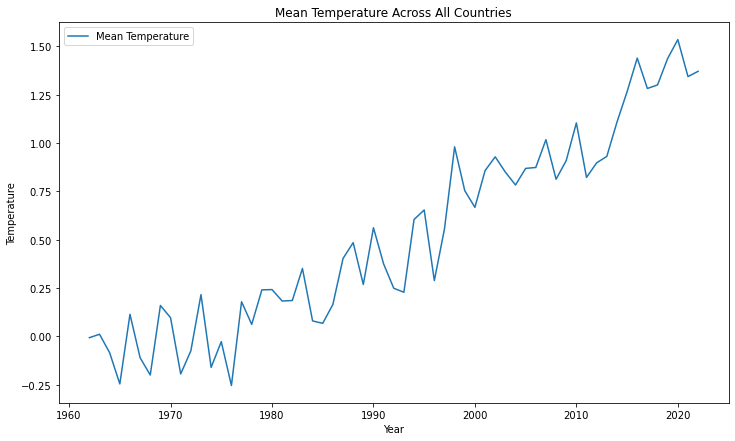

In [95]:
# Calculate the mean temperature for each year across all countries
mean_temperatures = df.drop('Country', axis=1).mean()

# Convert the Series to a DataFrame
mean_df = pd.DataFrame(mean_temperatures, columns=['Temperature'])

# Convert the index to datetime format
mean_df.index = pd.to_datetime([f'{year}-01-01' for year in range(1962, 2023)])

# Plot the mean temperatures to visualize
plt.figure(figsize=(12, 7))
plt.plot(mean_df.index.year, mean_df['Temperature'], label='Mean Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Mean Temperature Across All Countries')
plt.legend()
plt.show()

In [96]:
 #Extract values for normalization
data = mean_df.values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the sequence creation function
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

# Define the sequence length
seq_length = 10

# Create sequences and labels
X, y = create_sequences(scaled_data, seq_length)

# Reshape X to be 3-dimensional for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [97]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=1, epochs=20)

Epoch 1/20
51/51 [==============================] - 5s 13ms/step - loss: 0.0418
Epoch 2/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0110
Epoch 3/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 4/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 5/20
51/51 [==============================] - 1s 10ms/step - loss: 0.0100
Epoch 6/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 7/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0106
Epoch 8/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 9/20
51/51 [==============================] - 0s 10ms/step - loss: 0.0087
Epoch 10/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 11/20
51/51 [==============================] - 1s 10ms/step - loss: 0.0093
Epoch 12/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0113
Epoch 13/20
51/51 [========================

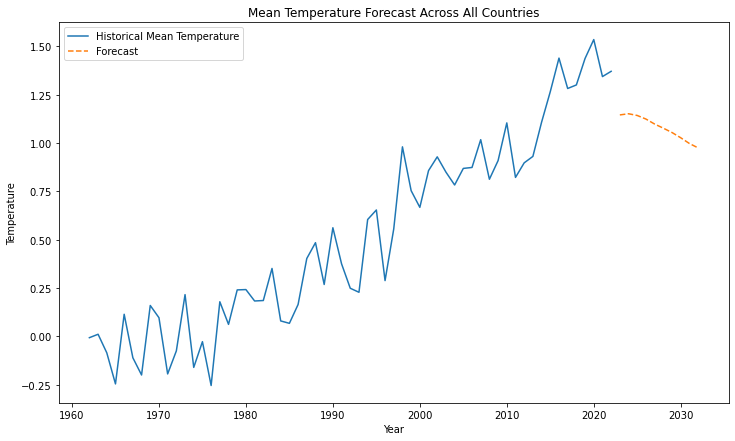

In [98]:
# Forecasting function
def forecast_future(model, data, seq_length, n_predictions):
    current_sequence = data[-seq_length:]
    predictions = []
    for _ in range(n_predictions):
        prediction = model.predict(current_sequence.reshape((1, seq_length, 1)))
        predictions.append(prediction[0, 0])
        current_sequence = np.append(current_sequence, prediction)[1:]
    return predictions

# Forecast the next 10 years
n_predictions = 10
predicted_temperatures = forecast_future(model, scaled_data, seq_length, n_predictions)

# Inverse transform the predictions to original scale
predicted_temperatures = scaler.inverse_transform(np.array(predicted_temperatures).reshape(-1, 1))

# Prepare the data for plotting
future_years = np.arange(2023, 2023 + n_predictions)
historical_years = mean_df.index.year
historical_temperatures = mean_df['Temperature'].values

# Plotting the results
plt.figure(figsize=(12, 7))
plt.plot(historical_years, historical_temperatures, label='Historical Mean Temperature')
plt.plot(future_years, predicted_temperatures, label='Forecast', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Mean Temperature Forecast Across All Countries')
plt.legend()
plt.show()

In [ ]:
data_melted = data.melt(id_vars=['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code',
                             'CTS_Name', 'CTS_Full_Descriptor'],
                    value_vars=[f'F{year}' for year in range(1961, 2023)],
                    var_name='Year', value_name='Temperature')

# Convert 'Year' to integer and 'Temperature' to float
data_melted['Year'] = data_melted['Year'].str.replace('F', '').astype(int)
data_melted['Temperature'] = data_melted['Temperature'].astype(float)
data_melted.head()

Country    0
F1962      0
F1963      0
F1964      0
F1965      0
          ..
F2018      0
F2019      0
F2020      0
F2021      0
F2022      0
Length: 62, dtype: int64